### 한국어 형태소 분석기 spaCy
- 빠른 속도와 정확도가 높은 형태소 분석기
- 설치 2단계
	* 형태소 분석기 설치
	* 언어별 모델 설치

In [1]:
# 모듈 로딩
import spacy

In [2]:
# 언어 모델 설정
LANG_MODEL = 'ko_core_news_sm'

In [3]:
# 한국어 분석기 생성
nlp = spacy.load(LANG_MODEL)

In [5]:
text = "일만 하고 놀지 못하면 바보 된다."
doc = nlp(text)

my_tokesn = []
for token in doc:
    # 							표제어, 		단어 품사, 	  자세한 품사,    불용어 여부, 		구두점 여부
    print(f'{token.text:6} {token.lemma_:6} {token.pos_:6} {token.tag_:6} {token.is_stop} {token.is_punct}')
    

일만     일+만    ADV              ncpa+jxc False
하고     하+고    CCONJ            pvg+ecc False
놀지     놀+지    VERB             pvg+ecx False
못하면    못하+면   SCONJ            px+ecs False
바보     바+보    NOUN             ncn+jcc False
된다     되+ㄴ다   AUX              px+ef  False
.      .      PUNCT            sf     False


In [6]:
my_tokens = []
for token in doc:
	# print(token.text)			# 토큰에 저장된 텍스트 속성
	# print(token.lemma_)		# 토큰의 표제어 속성
	# print(token.pos_)			# 토큰의 품사 속성
	# print(token.tag_)			# 토큰의 상세 품사 속성
	# print(token.is_stop)		# 토큰의 불용어 여부 속성
	# print(token.is_punct)		# 토큰의 구두점 여부 속성
	# print()

	if not token.is_stop:
		my_tokens.append(token)

In [7]:
my_tokens

[일만, 하고, 놀지, 못하면, 바보, 된다, .]

-  spacy Pipeline 이용
* 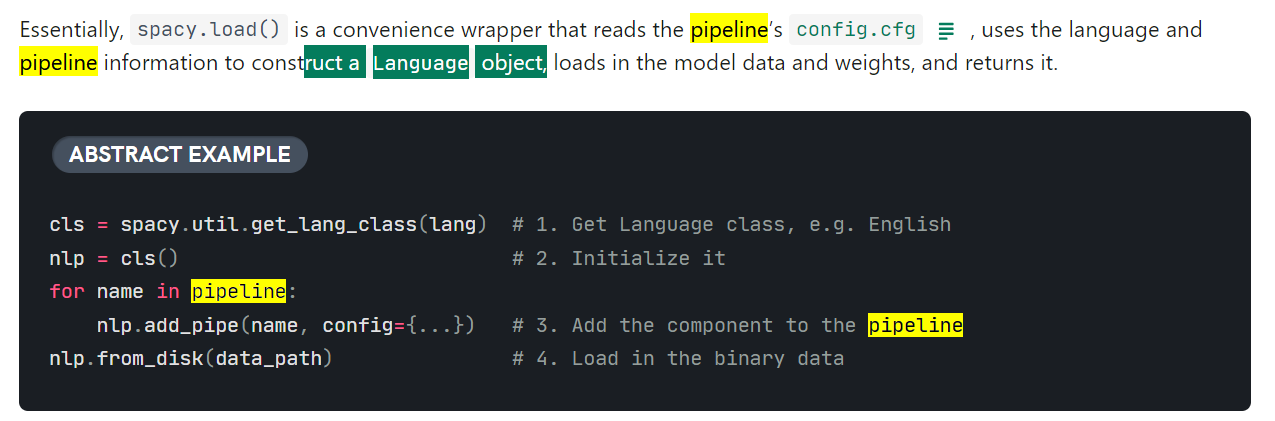

* 출처: https://spacy.io/api/top-level

- 품사 확인 이유: 목적에 맞는 형태로 분해하여 성능을 높이기 위해서 

#### 문장 구조 시각화

In [8]:
from IPython.display import SVG

In [9]:
SVG(spacy.displacy.render(doc))

<IPython.core.display.SVG object>

##### SoyNlp
* 비지도학습 기반의 형태소 분석기
* 미등록 토큰에 대한 처리가 좋음

https://pypi.org/project/soynlp/

In [10]:
# 데이터 파일 다운로드
from urllib.request import urlretrieve

''' 
[url 상에서 바로 다운로드]

data_url = 'https://raw.githubusercontent.com/lovit/soynlp/master/
tutorials/2016-10-20.txt'
data_filename='../data/2016-10-20.txt'
urlretrieve(data_url, data_filename)
'''

" \n[url 상에서 바로 다운로드]\n\ndata_url = 'https://raw.githubusercontent.com/lovit/soynlp/master/\ntutorials/2016-10-20.txt'\ndata_filename='../data/2016-10-20.txt'\nurlretrieve(data_url, data_filename)\n"

In [11]:
data_filename='../data/2016-10-20.txt'

##### 문서 단위 형태소 분석

- [말뭉치 생성]

In [12]:
# 모듈로딩
from soynlp import DoublespaceLineCorpus

In [14]:
# 파일에서 데이터 말뭉치(코퍼스) 생성
doc_corpus = DoublespaceLineCorpus(data_filename)
print(f'타입: {type(doc_corpus)}')
print(f'문서의 갯수 : {len(doc_corpus)} 개')



타입: <class 'soynlp.utils.utils.DoublespaceLineCorpus'>
문서의 갯수 : 30091 개


In [ ]:
# 앞 5개 문서 출력
i = 0
for idx, d in enumerate(doc_corpus):
	print(idx, d)
	if idx > 4: break

- [단어 추출]

In [15]:
from soynlp.word import WordExtractor

In [18]:
# 단어 추출 인스턴스 생성
wordExt = WordExtractor()

In [19]:
# 텍스트 데이터 제공 후 비지도 학습
wordExt.train(doc_corpus)

training was done. used memory 0.945 Gb


In [20]:
# 단어 추출
result = wordExt.extract()

all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


#### 토큰별 점수 확인<hr>

In [21]:
result['연']

Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=4.8206195206885205, right_branching_entropy=3.9203300200537807, left_accessor_variety=477, right_accessor_variety=351, leftside_frequency=25178, rightside_frequency=3554)

In [22]:
result['연합뉴']

Scores(cohesion_forward=0.43154839105434084, cohesion_backward=0, left_branching_entropy=2.9790047637715187, right_branching_entropy=-0.0, left_accessor_variety=142, right_accessor_variety=1, leftside_frequency=4689, rightside_frequency=0)

In [23]:
result['연합뉴스']

Scores(cohesion_forward=0.5710254410737682, cohesion_backward=0, left_branching_entropy=2.979159952224212, right_branching_entropy=3.892038729521627, left_accessor_variety=142, right_accessor_variety=162, leftside_frequency=4688, rightside_frequency=0)

In [25]:
print('토큰의 cohesion_forward 속성값: ', result['연합뉴스'].cohesion_forward)
print('토큰의 right_branching_entropy 속성값: ', result['연합뉴스'].right_branching_entropy)
print('토큰의 right_accessor_variety 속성값: ', result['연합뉴스'].right_accessor_variety)

토근의 cohesion_forward 속성값:  0.5710254410737682
토근의 right_branching_entropy 속성값:  3.892038729521627
토근의 right_accessor_variety 속성값:  162


In [26]:
print('토큰의 cohesion_forward 속성값: ', result['연합뉴'].cohesion_forward)
print('토큰의 right_branching_entropy 속성값: ', result['연합뉴'].right_branching_entropy)
print('토큰의 right_accessor_variety 속성값: ', result['연합뉴'].right_accessor_variety)


토근의 cohesion_forward 속성값:  0.43154839105434084
토근의 right_branching_entropy 속성값:  -0.0
토근의 right_accessor_variety 속성값:  1


#### 문장의 토큰화<hr>
* Tokenizer 인스턴스 필요

In [27]:
# Tokenizer 모듈 로딩
from soynlp.tokenizer import LTokenizer

- [L-토큰화]

In [28]:
tokenizer = LTokenizer()
tokenizer.tokenize("안전성에 문제있는 스마트폰을 휴대하고 탑승할 경우에 압수한다")

['안전성에', '문제있는', '스마트폰을', '휴대하고', '탑승할', '경우에', '압수한다']

In [29]:
tokenizer.tokenize("안전성에 문제있는 스마트폰을 휴대하고 탑승할 경우에 압수한다", flatten=False)

[('안전성에', ''),
 ('문제있는', ''),
 ('스마트폰을', ''),
 ('휴대하고', ''),
 ('탑승할', ''),
 ('경우에', ''),
 ('압수한다', '')]

In [30]:
# result.item -> item, score!
#					 응집력 점수를 기준으로 토큰화!
scores = {item:score.cohesion_forward for item, score in result.items() }


In [31]:
l_tokenizer = LTokenizer(scores=scores)

l_tokenizer.tokenize("안전성에 문제있는 스마트폰을 휴대하고 탑승할 경우에 압수한다", 
flatten=False)

[('안전', '성에'),
 ('문제', '있는'),
 ('스마트폰', '을'),
 ('휴대', '하고'),
 ('탑승', '할'),
 ('경우', '에'),
 ('압수', '한다')]